***1 Загрузка и первичный осмотр данных***


In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, plot, iplot


data = pd.read_csv("S02-hw-dataset.csv")
data.head(5)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [93]:
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


***2 Пропуски***

In [94]:
data.isna()

,user_id,age,country,purchases,revenue
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,True,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [95]:
data.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [96]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [97]:
data.tail(3)

,user_id,age,country,purchases,revenue
38,39,39.0,FR,7,1162
39,40,34.0,RU,7,2086
40,10,24.0,RU,7,511


In [98]:
print("кол-во ненормальных возрастов (выбросов): ", data[data["age"] <= 0]["age"].count() + data[data["age"] >= 100]["age"].count())
data[data["age"] >= 100]

кол-во ненормальных возрастов (выбросов):  1


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [99]:
print("кол-во ненормальных покупок: ", data[data["purchases"] < 0]["purchases"].count())
data[data["purchases"] < 0]

кол-во ненормальных покупок:  1


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [100]:
anomal_user_id = data.groupby("user_id")
for user_is, ser in anomal_user_id:
    if ser["age"].count() > 1:
        print("выброс в user_id: ", user_is)
        print(ser)

выброс в user_id:  10
    user_id   age country  purchases  revenue
9        10  24.0      RU          7      511
40       10  24.0      RU          7      511


In [101]:
print("покупки без зарплаты:\n ", data[(data["revenue"] == 0) & (data["purchases"] > 0)])

покупки без зарплаты:
      user_id   age country  purchases  revenue
10       11  24.0      US          4        0


**3 EDA**

In [102]:
data.head(5)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [103]:
data["country"].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [104]:
data.groupby("country")[["age"]].agg(median_age=("age", 'median')).join(
    data.groupby("country")[["purchases"]].agg(median_purchases=("purchases", 'median'))
)

,median_age,median_purchases
country,,
CN,24.0,4.5
DE,35.0,6.0
FR,42.0,6.0
RU,26.0,6.0
US,39.0,4.0


In [105]:
data.groupby("country").agg(
    median_age=("age", 'median'),
    median_purchases=("purchases", 'median')
)

,median_age,median_purchases
country,,
CN,24.0,4.5
DE,35.0,6.0
FR,42.0,6.0
RU,26.0,6.0
US,39.0,4.0


создадим возрастную группу и агрегируем 

In [106]:
age_up_limit = data["age"].quantile(0.99)
age_down_limit = data["age"].quantile(0.01)
reasonable_age = data[(data["age"] > age_down_limit) & (data["age"] < age_up_limit)].copy()
cuted_age = pd.cut(reasonable_age["age"], bins=5, precision=0, include_lowest=True)
reasonable_age["age_board"] = cuted_age
reasonable_age.groupby("age_board", observed=False).agg(count=("age", 'count') ) 

,count
age_board,
"(17.0, 26.0]",11
"(26.0, 34.0]",8
"(34.0, 41.0]",6
"(41.0, 49.0]",6
"(49.0, 57.0]",6


**ВИЗУАЛИЗАЦИЯ**

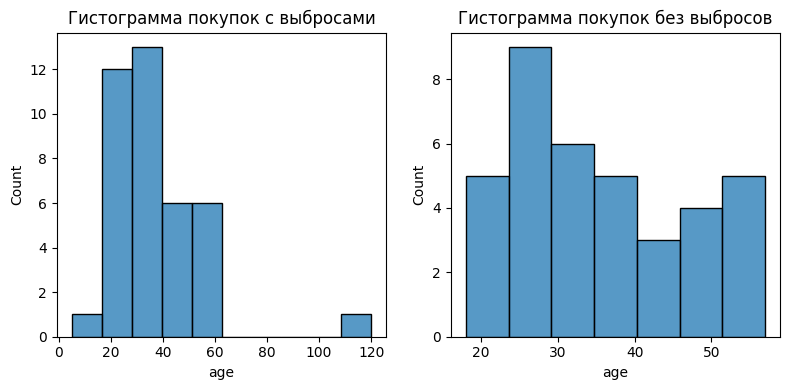

In [107]:
data_without_na = data[~data["age"].isna()].copy()
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(8, 4)
)
sns.histplot(data_without_na["age"], ax=ax1)
ax1.set_title("Гистограмма покупок с выбросами")
sns.histplot(reasonable_age["age"], ax=ax2)
ax2.set_title("Гистограмма покупок без выбросов")
plt.tight_layout()
fig.savefig('figur/age-displot.png')

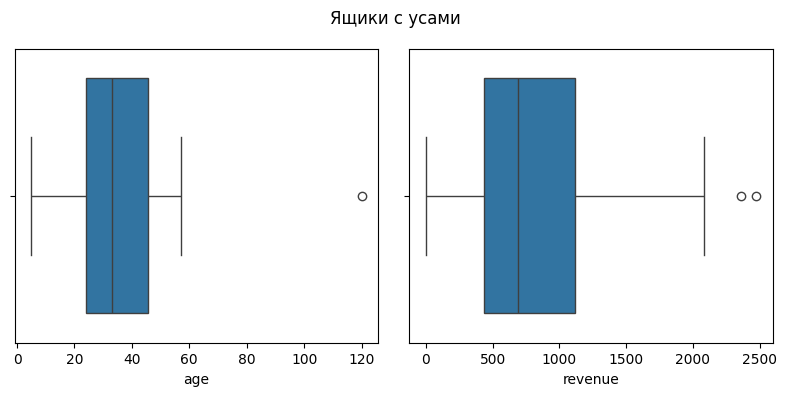

In [108]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(8, 4)
)
age_data = data[~data["age"].isna()]["age"]
sns.boxplot(
    data=age_data,
    orient="h",
    ax=ax1
)
sns.boxplot(
    data=data["revenue"],
    orient="h",
    ax=ax2
)
plt.suptitle("Ящики с усами")
plt.tight_layout()
fig.savefig('figur/boxplot.png')

In [109]:
trace1 = go.Scatter(
    x=data["age"],
    y=data["revenue"],
    name='Revenue based on age'
)
trace2 = go.Scatter(
    x=data["purchases"],
    y=data["revenue"],
    name='Revenue based on age'
)
data = [trace1, trace2]
layout = {'title': 'Scatter'}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)
fig.write_html("figur/scatter.html")